In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_loan=pd.read_csv('loan.csv')

# Data Preprocessing

**Analyzing raw data: Check the first 5 rows.**

In [3]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**Checking for null values and dropping columns having all values as null**

In [4]:
null_columns=df_loan.isnull().sum()

null_columns=null_columns[null_columns>0]
print("Below columns have null vales \n",null_columns)

Below columns have null vales 
 emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64


In [5]:
df_loan.dropna(axis=1,how='all',inplace=True)

In [6]:
df_loan.shape

(39717, 57)

### We have removed few attributes from analysis

#### These attributes either have single values or are used post loan disbursal, hence they are of no use to analysis

- Payment plan : Only n value in it <br>
- initial_list_status : Has single value F<br>
- collections_12_mths_ex_med : Has 0,NA only<br>
- policy_code : value of 1 only <br>
- application_type : only single value present<br>
- acc_now_delinq : Only 0 present in data<br>
- chargeoff_within_12_mths : only 0 and NA<br>
- delinq_amnt : only 0 present in data<br>
- tax_liens : 0 and NA only<br>
- collection_recovery_fee,last_pymnt_amnt,total_rec_late_fee,total_rec_prncp,out_prncp,out_prncp_inv: these are post loan disbursal column
- last_credit_pull_d : Credit pull date has no signficance for our analysis

In [7]:
df_loan.drop(['id','emp_title','pymnt_plan', 'url','desc','title','initial_list_status','next_pymnt_d','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','last_pymnt_d',"total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee","total_rec_prncp","out_prncp","out_prncp_inv","recoveries","collection_recovery_fee","last_pymnt_amnt","last_credit_pull_d","funded_amnt_inv"],axis=1,inplace=True)

In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   member_id               39717 non-null  int64  
 1   loan_amnt               39717 non-null  int64  
 2   funded_amnt             39717 non-null  int64  
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  purpose                 39717 non-null

#### Checking for null values and dropping columns in null values is more than 40%

In [9]:
df_loan.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
pub_rec_bankruptcies        697
dtype: int64

In [10]:
df_loan.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1,inplace=True)

# Data Cleaning

**We have done data cleaning for emp_length,revol_util,int_rate and also converted them to desriable data format.** 

In [11]:
df_loan['emp_length']=df_loan['emp_length'].str.replace("years","")
df_loan['emp_length']=df_loan['emp_length'].str.replace("year","")
df_loan['emp_length']=df_loan['emp_length'].str.replace("< 1","0")
#df_loan['emp_length']=df_loan['emp_length'].str.replace('10+ ', '10')
df_loan['emp_length']=df_loan['emp_length'].str.replace(r'(^.*10+.*$)', '10')


In [12]:
df_loan['emp_length'].fillna(df_loan['emp_length'].median(),inplace=True)

In [13]:
df_loan['revol_util']=df_loan['revol_util'].str.replace("%","")

In [14]:
df_loan['revol_util'].value_counts()

0        977
0.20      63
63        62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64

In [15]:
df_loan.dropna(subset=['revol_util'],inplace=True,axis=0)

In [16]:
df_loan['revol_util']=df_loan['revol_util'].astype(float)

In [17]:
df_loan['int_rate']=df_loan['int_rate'].str.replace("%","")

In [18]:
df_loan['int_rate']=df_loan['int_rate'].astype(float)

In [19]:
df_loan['pub_rec_bankruptcies'].fillna(0,inplace=True)


### Checking for shape and datatype of dataframe after cleaning and pre processing of data

In [20]:
df_loan.shape

(39667, 27)

In [21]:
df_loan.isnull().sum()

member_id               0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [22]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39667 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_id             39667 non-null  int64  
 1   loan_amnt             39667 non-null  int64  
 2   funded_amnt           39667 non-null  int64  
 3   term                  39667 non-null  object 
 4   int_rate              39667 non-null  float64
 5   installment           39667 non-null  float64
 6   grade                 39667 non-null  object 
 7   sub_grade             39667 non-null  object 
 8   emp_length            39667 non-null  object 
 9   home_ownership        39667 non-null  object 
 10  annual_inc            39667 non-null  float64
 11  verification_status   39667 non-null  object 
 12  issue_d               39667 non-null  object 
 13  loan_status           39667 non-null  object 
 14  purpose               39667 non-null  object 
 15  zip_code           

In [23]:
df_loan.duplicated().sum()

0

**We have cleaned the data and found out that no null or duplicate values are present in data and final
dataframe has 27 columns which would be used for further analysis.**

In [24]:
cat_cols=["member_id","term","grade","sub_grade","home_ownership","verification_status","issue_d","loan_status"]
num_cols=["loan_amnt","funded_amnt","installment","annual_inc",'int_rate','revol_bal','revol_util','pub_rec_bankruptcies','inq_last_6mths','open_acc',"dti","total_acc"]

In [25]:
num_1=["dti","total_acc"]
cat_1=["purpose","zip_code","addr_state","emp_length","delinq_2yrs","earliest_cr_line",'pub_rec']

In [26]:
df_loan['loan_status'].value_counts()

Fully Paid     32916
Charged Off     5611
Current         1140
Name: loan_status, dtype: int64

In [27]:
loan_status_per=df_loan['loan_status'].value_counts(normalize=True)*100
print(loan_status_per)


Fully Paid     82.980815
Charged Off    14.145259
Current         2.873925
Name: loan_status, dtype: float64


# Univaraite analysis

### Summary Statistics for Numerical coulmns

In [28]:
df_loan[num_cols].describe()

,loan_amnt,funded_amnt,installment,annual_inc,int_rate,revol_bal,revol_util,pub_rec_bankruptcies,inq_last_6mths,open_acc,dti,total_acc
count,39667.000000,39667.000000,39667.000000,3.966700e+04,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000
mean,11227.664053,10955.590919,324.770793,6.899952e+04,12.016587,13398.155394,48.832152,0.042529,0.869211,9.300250,13.318704,22.103411
std,7456.610740,7187.135178,208.882852,6.378947e+04,3.723856,15887.036743,28.332634,0.202668,1.070422,4.398866,6.676975,11.398386
min,500.000000,500.000000,15.690000,4.000000e+03,5.420000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
25%,5500.000000,5400.000000,167.080000,4.051632e+04,9.250000,3717.000000,25.400000,0.000000,0.000000,6.000000,8.180000,14.000000
50%,10000.000000,9625.000000,280.610000,5.900000e+04,11.830000,8863.000000,49.300000,0.000000,1.000000,9.000000,13.410000,20.000000
75%,15000.000000,15000.000000,430.780000,8.240000e+04,14.540000,17070.000000,72.400000,0.000000,1.000000,12.000000,18.600000,29.000000
max,35000.000000,35000.000000,1305.190000,6.000000e+06,24.590000,149588.000000,99.900000,2.000000,8.000000,44.000000,29.990000,90.000000


In [29]:
df_loan[num_cols].describe()

,loan_amnt,funded_amnt,installment,annual_inc,int_rate,revol_bal,revol_util,pub_rec_bankruptcies,inq_last_6mths,open_acc,dti,total_acc
count,39667.000000,39667.000000,39667.000000,3.966700e+04,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000
mean,11227.664053,10955.590919,324.770793,6.899952e+04,12.016587,13398.155394,48.832152,0.042529,0.869211,9.300250,13.318704,22.103411
std,7456.610740,7187.135178,208.882852,6.378947e+04,3.723856,15887.036743,28.332634,0.202668,1.070422,4.398866,6.676975,11.398386
min,500.000000,500.000000,15.690000,4.000000e+03,5.420000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
25%,5500.000000,5400.000000,167.080000,4.051632e+04,9.250000,3717.000000,25.400000,0.000000,0.000000,6.000000,8.180000,14.000000
50%,10000.000000,9625.000000,280.610000,5.900000e+04,11.830000,8863.000000,49.300000,0.000000,1.000000,9.000000,13.410000,20.000000
75%,15000.000000,15000.000000,430.780000,8.240000e+04,14.540000,17070.000000,72.400000,0.000000,1.000000,12.000000,18.600000,29.000000
max,35000.000000,35000.000000,1305.190000,6.000000e+06,24.590000,149588.000000,99.900000,2.000000,8.000000,44.000000,29.990000,90.000000


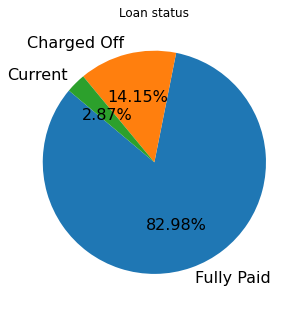

In [75]:
plt.figure(figsize=(5,6))
plt.pie(loan_status_per, autopct='%1.2f%%',labels=loan_status_per.index, startangle=140,textprops={'fontsize': 16})
plt.title('Loan status')
plt.show()


In [31]:
df_filter=df_loan[df_loan['loan_status'] != 'Current']

**As we proceed with the analysis, we are excluding borrowers whose loan status is marked as "active." This decision is driven by our focus on identifying defaulters so we are excluding users with loans_status='current'**

In [32]:
df_num=df_filter[["loan_amnt","funded_amnt","installment","annual_inc",'int_rate','revol_bal','pub_rec_bankruptcies','inq_last_6mths','open_acc']]

**Checking for outliers**

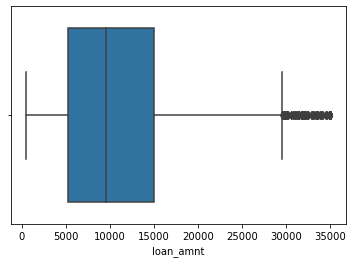

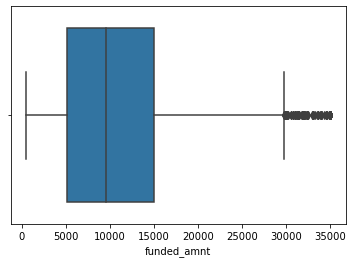

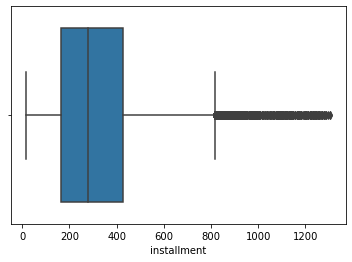

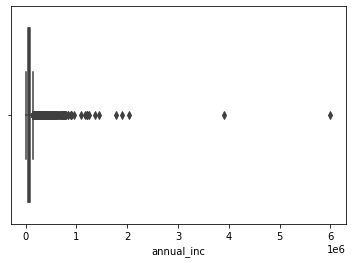

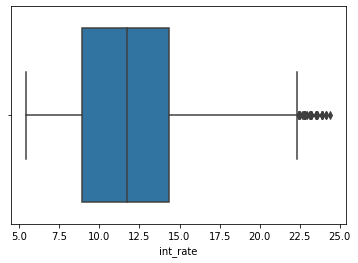

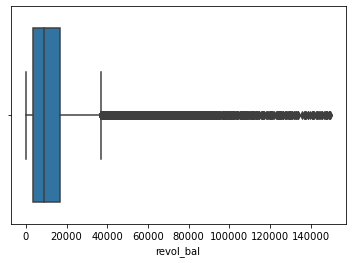

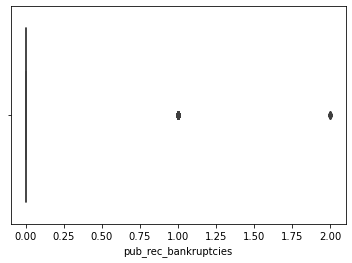

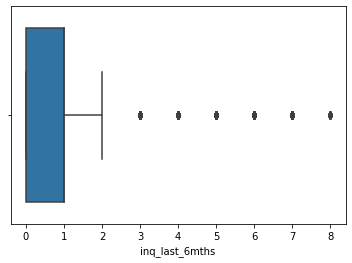

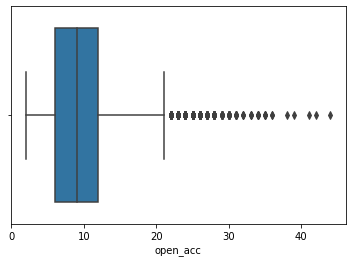

In [33]:
for column in df_num.columns:
    sns.boxplot(df_num[column])
    plt.show()
   

**We can see that in all numerical columns outliers are present**

### 1. Analyzing Home ownership

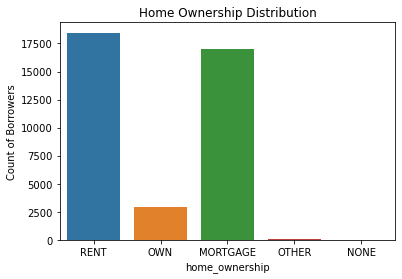

In [83]:
sns.countplot(x=df_filter['home_ownership'],data=df_filter[df_filter['loan_status']=='Charged Off'])
plt.title('Home Ownership Distribution')
plt.ylabel('Count of Borrowers')
plt.show()


**Graph shows that rent,mortgage categories are having highest number of loan defaulters.**

### 2. Analyzing issue date

In [35]:
df_filter['year']=pd.to_datetime(df_filter['issue_d'],format='%b-%y').dt.year

In [36]:
df_filter['month']=pd.to_datetime(df_filter['issue_d'],format='%b-%y').dt.month

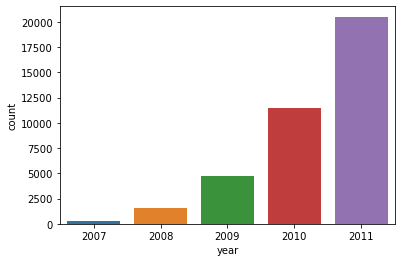

In [37]:
sns.countplot(x=df_filter['year'])
plt.show()

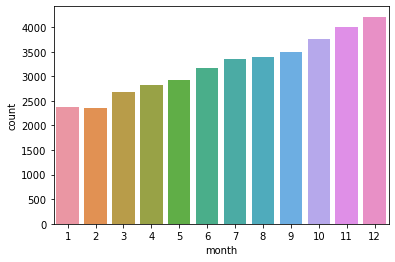

In [38]:
sns.countplot(x=df_filter['month'])
plt.show()

**Graph shows that there is increase in number of borrowers over the year and in Dec maximum loans are approved** 

### 3. Analyzing employment length

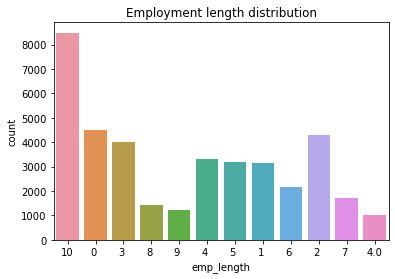

In [39]:
sns.countplot(x='emp_length', data=df_filter)
plt.title('Employment length distribution')
plt.show()

### 4. Analyzing address state distribution

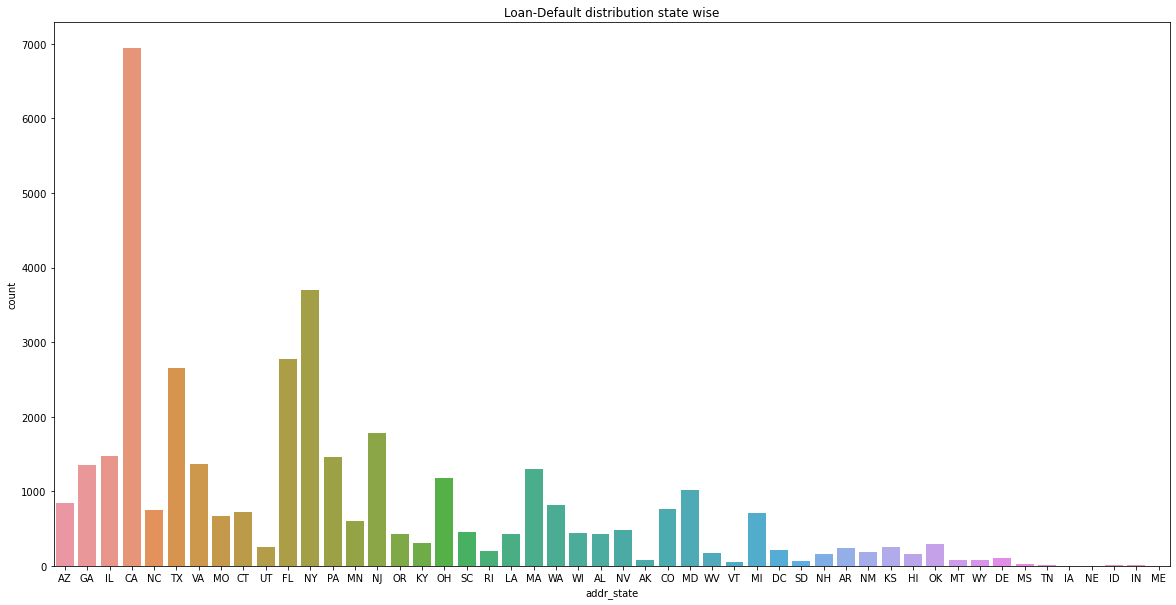

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(x='addr_state',data=df_filter,orient='v')
plt.title('Loan-Default distribution state wise')
plt.show()

### 5. Analyzing DTI

**DTI is a numerical column, We have divided dti into ranges so that we can treat them as category and perform categorical analysis on the same**

In [41]:
df_filter['dti_groups'] = pd.cut(df_filter['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

Text(0.5, 1.0, 'DTI vs Loan-Default data')

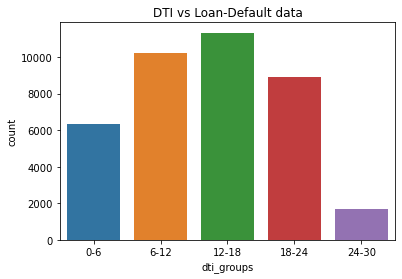

In [42]:
sns.countplot(x='dti_groups', data=df_filter)
plt.title('DTI vs Loan-Default data')

### 6. Analyzing pupose

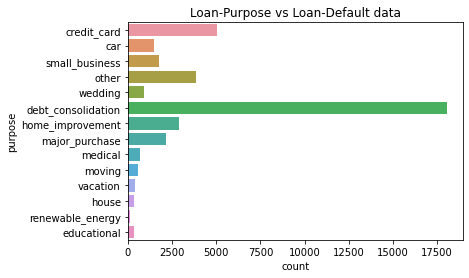

In [43]:
sns.countplot(y ='purpose', data=df_filter)
plt.title('Loan-Purpose vs Loan-Default data')
plt.show()

**Graph shows that most default happens when loan is taken to repay another loan**

### 7. Analyzing deliquency 2 years

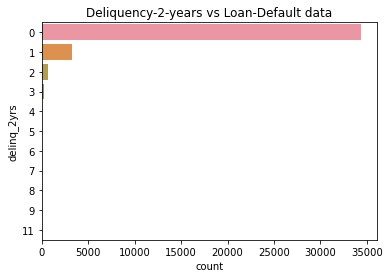

In [44]:
sns.countplot(y ='delinq_2yrs', data=df_filter)
plt.title('Deliquency-2-years vs Loan-Default data')
plt.show()

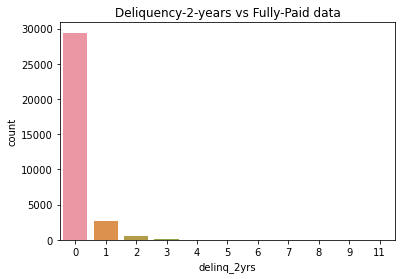

In [77]:
sns.countplot(x ='delinq_2yrs', data=df_filter[df_filter.loan_status == 'Fully Paid'])
plt.title('Deliquency-2-years vs Fully-Paid data')
plt.show()

**There seems to be no relation between delinq_2yrs and default rate**

### 8. Analyzing total accounts

- total account varies from 2-90. So we can create buckets here

In [78]:
df_filter['total_acc_groups'] = pd.cut(df_filter['total_acc'], bins=10,precision =0,labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'])

Text(0.5, 1.0, 'Total-Accounts vs Fully-Paid data')

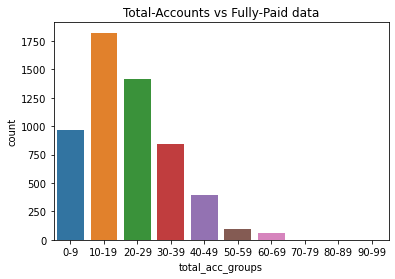

In [79]:
sns.countplot(x='total_acc_groups', data=df_filter[df_filter['loan_status']=='Charged Off'])
plt.title('Total-Accounts vs Fully-Paid data')

### 9. Analyzing earliest_cr_line

In [48]:
df_loan.earliest_cr_line.describe()

count      39667
unique       526
top       Nov-98
freq         370
Name: earliest_cr_line, dtype: object

#### Since earliest credit line is in form of mm-yy we can convert it to year count

In [49]:
df_loan.earliest_cr_line = pd.to_numeric(df_loan.earliest_cr_line.apply(lambda x : x.split('-')[1]))

In [111]:
df_loan.earliest_cr_line = pd.to_numeric(df_loan.earliest_cr_line.apply(lambda x : x if x < 12 else 100 - x))

In [112]:
df_loan['earliest_cr_line'].value_counts

<bound method IndexOpsMixin.value_counts of 0        85
1         1
2         1
3         4
4         4
         ..
39712    10
39713    86
39714     2
39715    88
39716     3
Name: earliest_cr_line, Length: 39667, dtype: int64>

We are dividing earliest credit line to buckets to analyse better

In [51]:
df_loan['earliest_cr_line_groups'] = pd.cut(df_loan['earliest_cr_line'], bins=10,precision =0,labels=['0-5','6-12','13-18','19-24','25-30','31-36','37-42','43-48','49-54','55-60'])

Text(0.5, 1.0, 'Earliest credit years vs Loan default data')

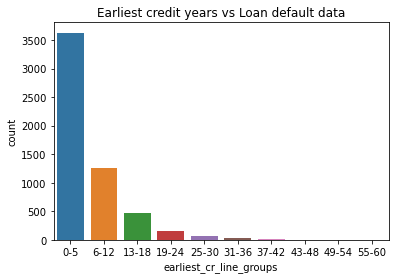

In [52]:
sns.countplot(x='earliest_cr_line_groups', data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.title('Earliest credit years vs Loan default data')

### 10. Analyzing pub_rec

In [53]:
df_loan.pub_rec.describe()

count    39667.000000
mean         0.055084
std          0.237247
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

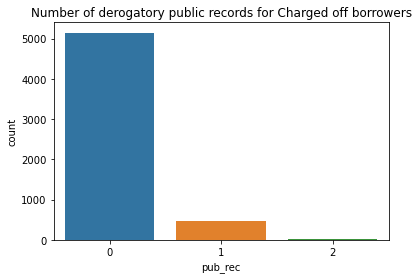

In [54]:
sns.countplot(x='pub_rec', data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.title('Number of derogatory public records for Charged off borrowers')
plt.show()

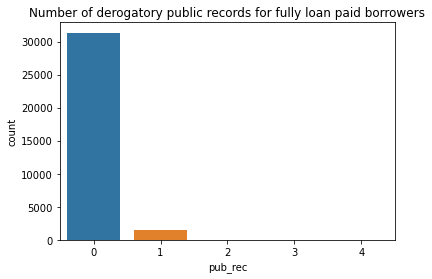

In [55]:
sns.countplot(x='pub_rec', data=df_loan[df_loan['loan_status']=='Fully Paid'])
plt.title('Number of derogatory public records for fully loan paid borrowers')
plt.show()

Number of derogatory public records seems to have no effect on probability of defaulting

### 11. Verification status Analysis

Text(0.5, 1.0, 'Verification status')

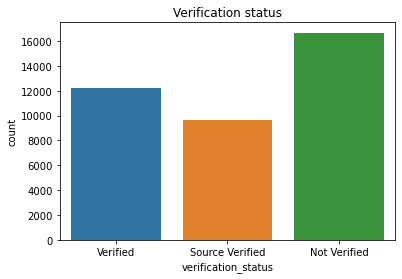

In [113]:
sns.countplot(x=df_filter['verification_status'], data=df_filter['loan_status']=='Charged off')
plt.title('Verification status')

### 12.Intrest rate Analysis

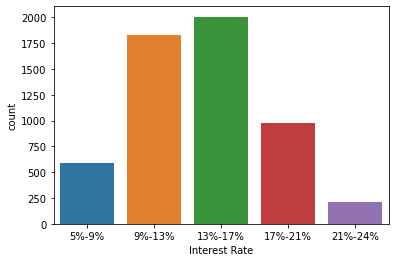

In [116]:
#plt.subplot(2,2,1)
sns.countplot(x='int_rate_groups', data=df_filter[df_filter.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.show()


**Borrowers who are charged off fall under intrest rate of 13-17%.**

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants have rented or mortgaged homes
- Dti is between 12-18
- Applicants who have 10-19 loan accounts
- Applicants who have recent credit history
- Applicants with unverified income
- Applicants who are not verfied
- Borrowers who are charged off fall under intrest rate of 13-17%.


# Bivariate Analysis

### 1. Annual income vs Loan status analysis

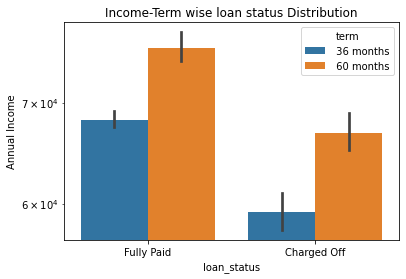

In [57]:
sns.barplot(x=df_filter['loan_status'],y=df_filter['annual_inc'],hue=df_filter['term'])
plt.yscale('log')
plt.title('Income-Term wise loan status Distribution')
plt.ylabel('Annual Income')
plt.show()

**Borrowers having high income have fully paid the loan.**

### 2. Grade and Annual income vs loan status analysis

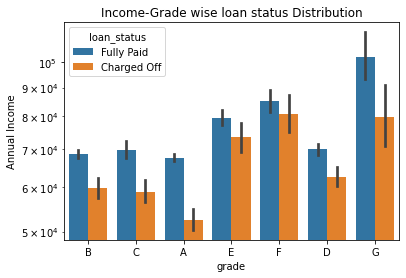

In [84]:
sns.barplot(x=df_filter['grade'],y=df_filter['annual_inc'],hue=df_filter['loan_status'])
plt.yscale('log')
plt.title('Income-Grade wise loan status Distribution')
plt.ylabel('Annual Income')

plt.show()


**Borrowers belonging to G grade have the maximum annual income and majority of them have paid loan**

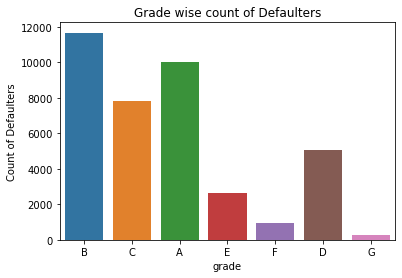

In [87]:
sns.countplot(x=df_filter['grade'],data=df_filter['loan_status']=='Charged off')
#plt.yscale('log')
plt.title('Grade wise count of Defaulters')
plt.ylabel('Count of Defaulters')

plt.show()


**Grade B has maximum number of Defaulters**

### 3. Home ownership vs loan amount and status analysis

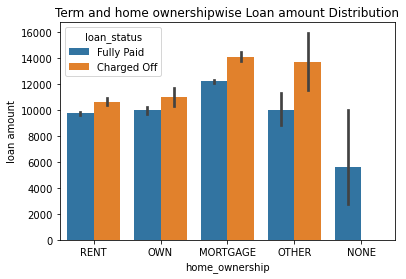

In [101]:
sns.barplot(x=df_filter['home_ownership'],y=df_filter['loan_amnt'], hue=df_filter['loan_status'], data=df_filter)
#plt.yscale('log')
plt.title('Term and home ownershipwise Loan amount Distribution')
plt.ylabel('loan amount')
plt.show()

**Mortgage is leading among home ownership categoery in terms of loan amount**

### 4. Verification status , loan amount vs loan status

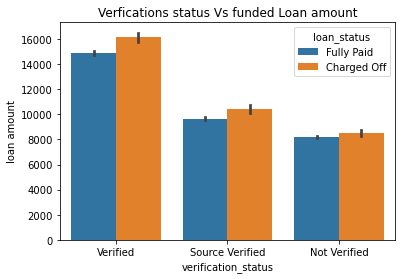

In [61]:
sns.barplot(x=df_filter['verification_status'],y=df_filter['funded_amnt'], hue=df_filter['loan_status'],data=df_filter['loan_status']=='Charged off')
#plt.yscale('log')
plt.title('Verfications status Vs funded Loan amount')
plt.ylabel('loan amount')
plt.show()

**As the loan amount increases though we have verified the borrowers they might get charged off**

In [62]:
verification_count=df_filter.groupby(['verification_status','member_id']).nunique()


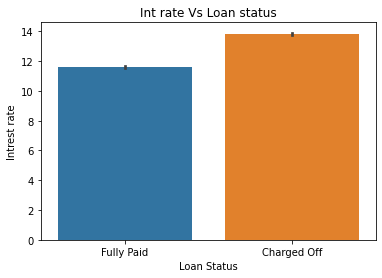

In [93]:
#plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='int_rate', data=df_filter)
plt.title('Int rate Vs Loan status')
plt.xlabel('Loan Status')
plt.ylabel('Intrest rate')
plt.show()

**Graph shows when interest rate is high there are more chances of being charged off**

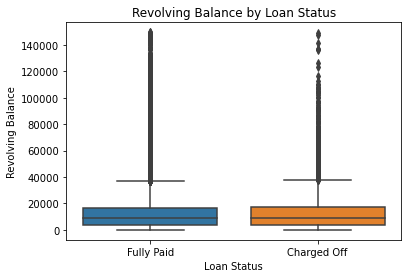

In [108]:
#plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_bal', data=df_filter)
plt.title('Revolving Balance by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Balance')
plt.show()

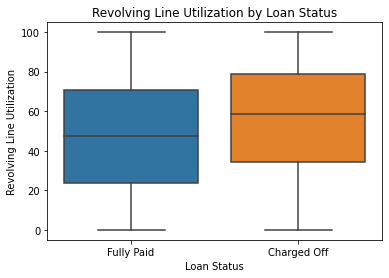

In [109]:
sns.boxplot(x='loan_status', y='revol_util', data=df_filter)
plt.title('Revolving Line Utilization by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Line Utilization')
plt.show()

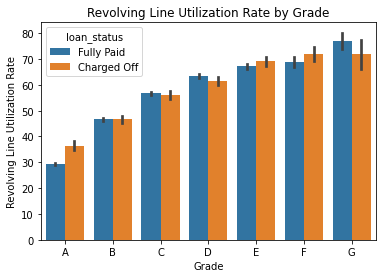

In [105]:
#plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='revol_util', data=df_filter,hue='loan_status', order=sorted(df_loan['grade'].unique()))
plt.title('Revolving Line Utilization Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Revolving Line Utilization Rate')
plt.show()

**The revolving line utilization rate having value of 30 shows that borrowers exhibiting responsible as they are using only 30% of their available revolving credit where as grade G borrowers are at higher risk of defaulting with utiilzation rate of 80%**

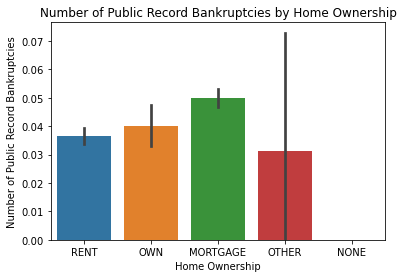

In [66]:
#plt.figure(figsize=(10, 6))
sns.barplot(x='home_ownership', y='pub_rec_bankruptcies', data=df_filter)
plt.title('Number of Public Record Bankruptcies by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Public Record Bankruptcies')
#plt.yticks(np.arange(0, df_loan['pub_rec_bankruptcies'].max() + 1, 1))
plt.show()

**Borrowers having mortgage have high possibility of Bankruptcies** 

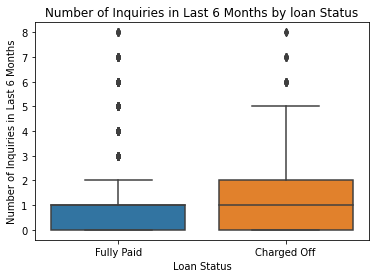

In [67]:
sns.boxplot(x='loan_status', y='inq_last_6mths', data=df_filter)
plt.title('Number of Inquiries in Last 6 Months by loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Inquiries in Last 6 Months')
plt.show()

**Graph shows that charged off people have been inquired more in last 6 months.**

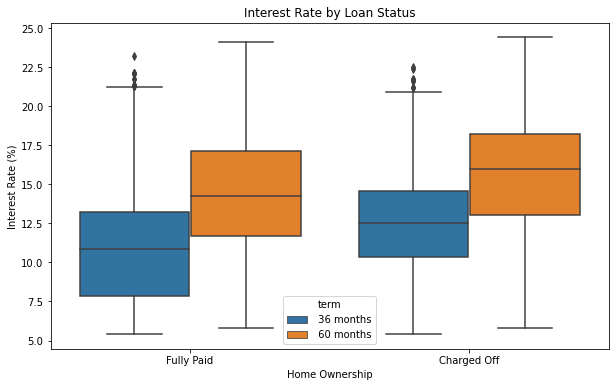

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate',hue='term' ,data=df_filter)
plt.title('Interest Rate by Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Interest Rate (%)')
plt.show()


**Graph shows term wise intrest rate distribution which is almost same for both loan status categories**

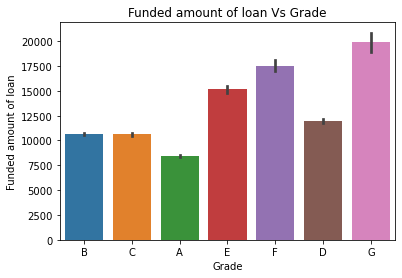

In [110]:
#plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='funded_amnt',data=df_filter)
plt.title('Funded amount of loan Vs Grade')
plt.xlabel('Grade')
plt.ylabel('Funded amount of loan')
plt.show()

**We are creating bins to analyze numerical column in more efficient manner**

In [94]:
df_filter['int_rate_groups'] = pd.cut(df_filter['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'],right=False)
df_filter['open_acc_groups'] = pd.cut(df_filter['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'],right=False)
df_filter['revol_util_groups'] = pd.cut(df_filter['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'],right=False)


In [72]:
df_filter['open_acc_groups'] = pd.cut(df_filter['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])


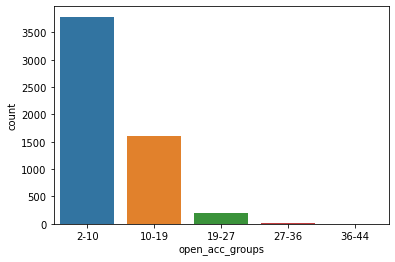

In [73]:
sns.countplot(x='open_acc_groups', data=df_filter[df_filter.loan_status == 'Charged Off'])
plt.show()

**Most borrowers have 2-10 number of open credit lines**

**Loan vs Loan purpose**

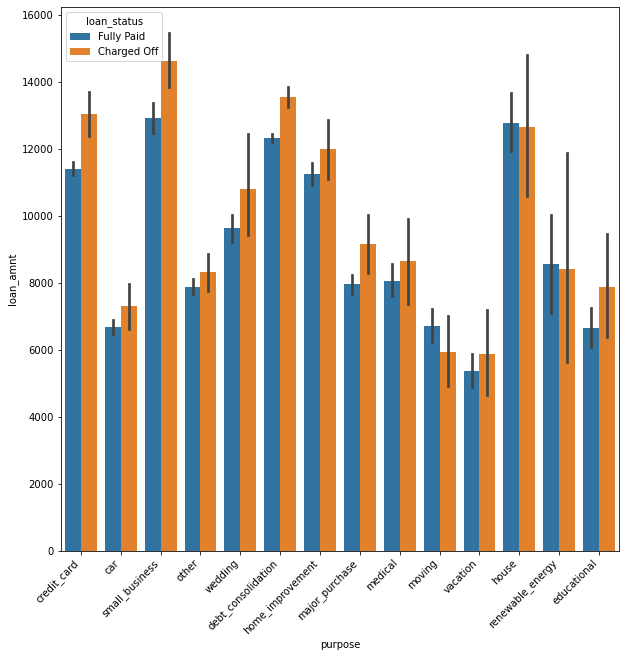

In [91]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_filter,y='loan_amnt', x='purpose', hue ='loan_status')
plt.xticks(rotation=45, ha='right')
plt.show()

**Loan vs total account**

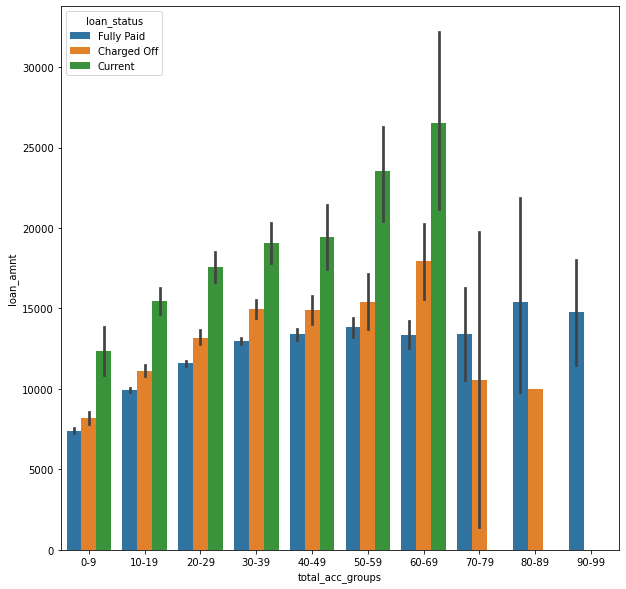

In [92]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_loan,y='loan_amnt', x='total_acc_groups', hue ='loan_status')
plt.show()

# Observation
- Borrowers having high income have fully paid the loan.
- Borrowers belonging to G grade have the maximum annual income and majority of them have paid the loan.
- Borrowers belonging to Grade B are prominent among defaulters.
- Default rate is highest when loan is taken for small business
- Default rate is lowest for vacation